In [1]:
# Using ANN to predict energy generation of a power plant.
# Original data soruced from UCI Repo: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
# AT = Ambinet temp (degC), AP = Ambient pressure (mBar), RH = Relative humidity (%)
# V = Exhaust vacuum (cmHg), PE = Net hourly Production (MW)
# Index is hours, but no date or time is given -> will keep as hourly index

# This could (should) also be done using RNN if forecasting is desired

In [105]:
# Import libs
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [112]:
# Import data set
df = pd.read_excel('Folds5x2_pp.xlsx')
df_static = pd.read_excel('Folds5x2_pp.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [53]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [67]:
df.iloc[:, :-1]

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [71]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [50]:
df.iloc[:, -1]

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

In [14]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


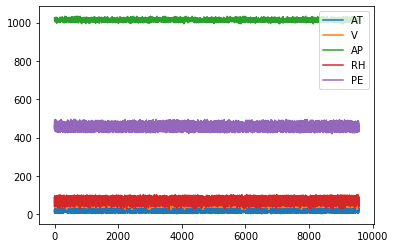

In [72]:
df.plot()

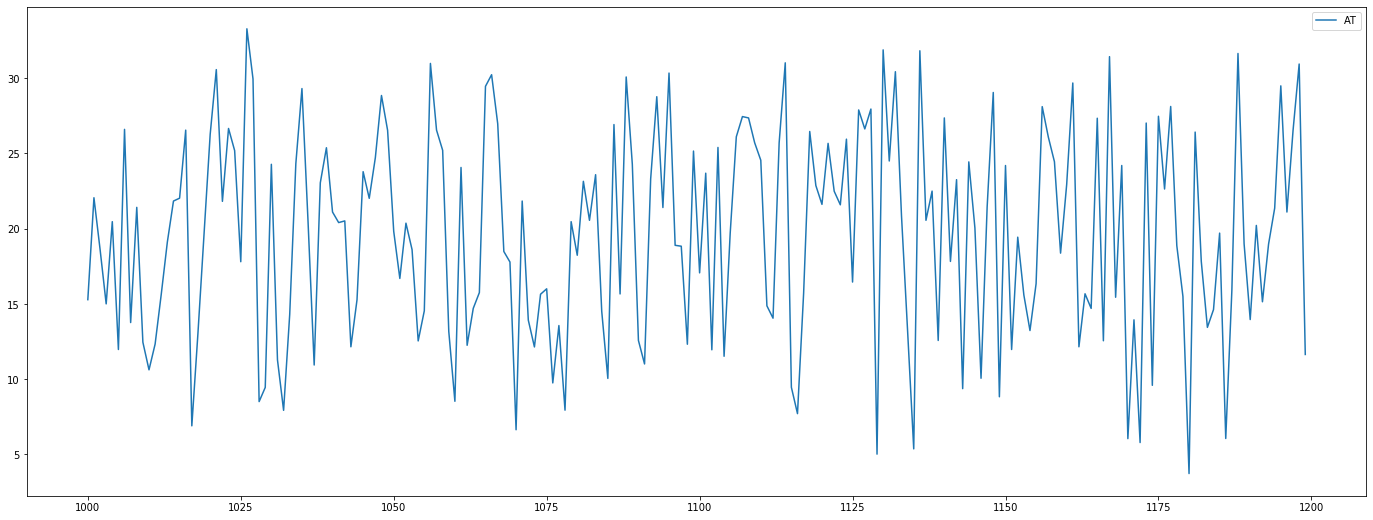

In [78]:
df['AT'][1000:1200].plot(figsize=(24,9),legend=True)

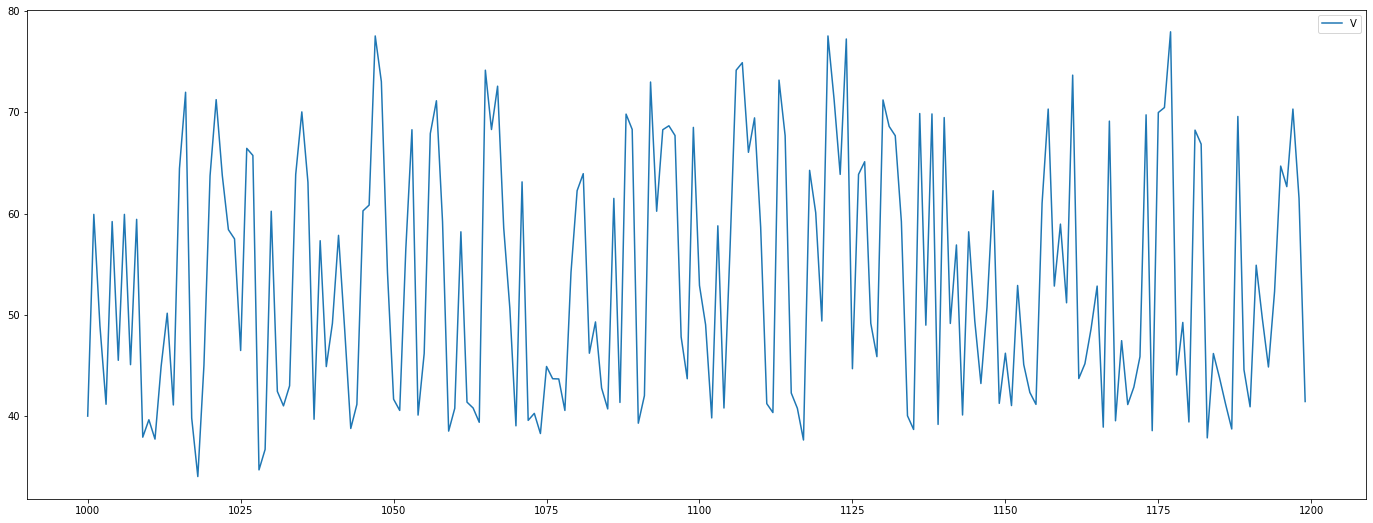

In [106]:
df['V'][1000:1200].plot(figsize=(24,9),legend=True)

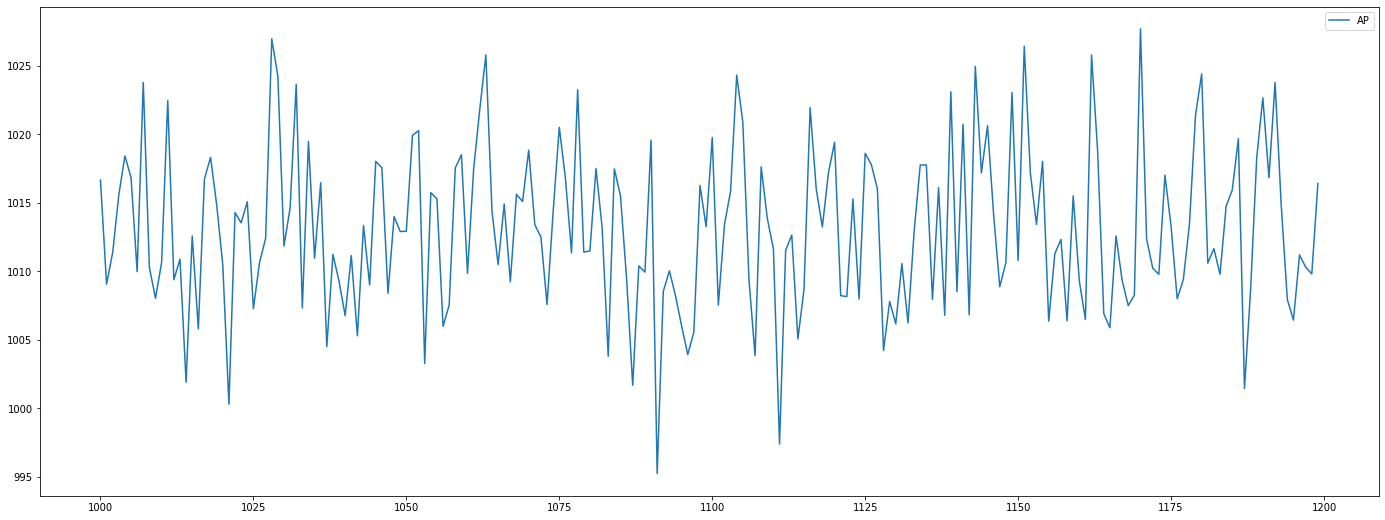

In [114]:
df['AP'][1000:1200].plot(figsize=(24,9),legend=True)

In [116]:
df_static

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


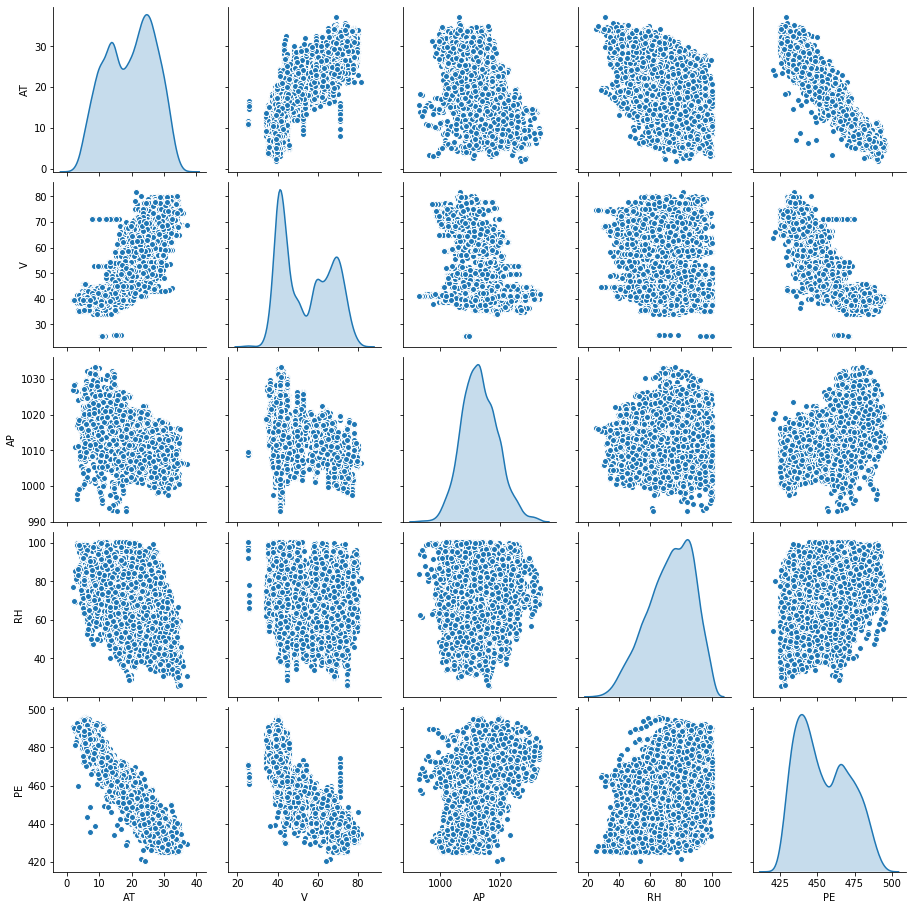

In [130]:
sns.pairplot(df_static,diag_kind='kde',plot_kws=dict(edgecolor="w", linewidth=1))

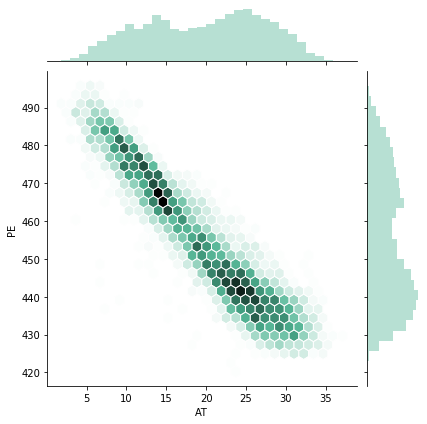

In [137]:
sns.jointplot(df_static['AT'], df_static['PE'], kind="hex", color="#4CB391",edgecolor="w")

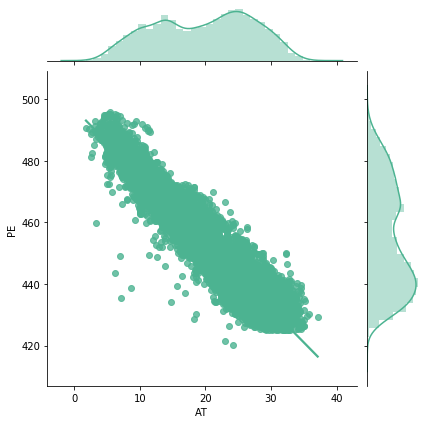

In [142]:
sns.jointplot(df_static['AT'], df_static['PE'], kind="reg", color="#4CB391")

#Some res

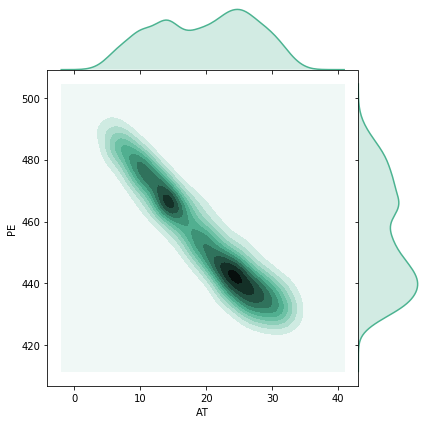

In [144]:
sns.jointplot(df_static['AT'], df_static['PE'], data=df_static,
                  kind="kde", space=0, color="#4CB391")

In [43]:
# Split into train/test -> EP is y, rest is X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [5]:
# Import ANN
ann = tf.keras.models.Sequential()

# Define ANN -> input + 3 hidden layers + output
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [6]:
# Compile ANN with MSE loss 
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [7]:
#Train on training set
ann.fit(X_train, y_train, batch_size = 64, epochs = 750)


Epoch 1/750
120/120 [==============================] - 0s 2ms/step - loss: 79083.2656A: 0s - loss: 84414.6406
Epoch 2/750
120/120 [==============================] - 0s 2ms/step - loss: 383.4239
Epoch 3/750
120/120 [==============================] - 0s 2ms/step - loss: 309.5790
Epoch 4/750
120/120 [==============================] - 0s 2ms/step - loss: 273.5391
Epoch 5/750
120/120 [==============================] - 0s 2ms/step - loss: 239.2150
Epoch 6/750
120/120 [==============================] - 0s 2ms/step - loss: 207.9367
Epoch 7/750
120/120 [==============================] - 0s 2ms/step - loss: 178.3080
Epoch 8/750
120/120 [==============================] - 0s 2ms/step - loss: 151.2802
Epoch 9/750
120/120 [==============================] - 0s 2ms/step - loss: 124.6090
Epoch 10/750
120/120 [==============================] - 0s 2ms/step - loss: 101.8933
Epoch 11/750
120/120 [==============================] - 0s 2ms/step - loss: 83.6253
Epoch 12/750
120/120 [===========================

In [34]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2) # Reduce size of sig figs
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[454.69 455.27]
 [439.52 436.31]
 [433.3  440.68]
 ...
 [481.73 479.53]
 [434.86 435.76]
 [455.13 457.1 ]]


In [35]:
assessment = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [36]:
assessment = pd.DataFrame(data = assessment, columns = ['Predicted Energy Output', 'Real Energy Output'])

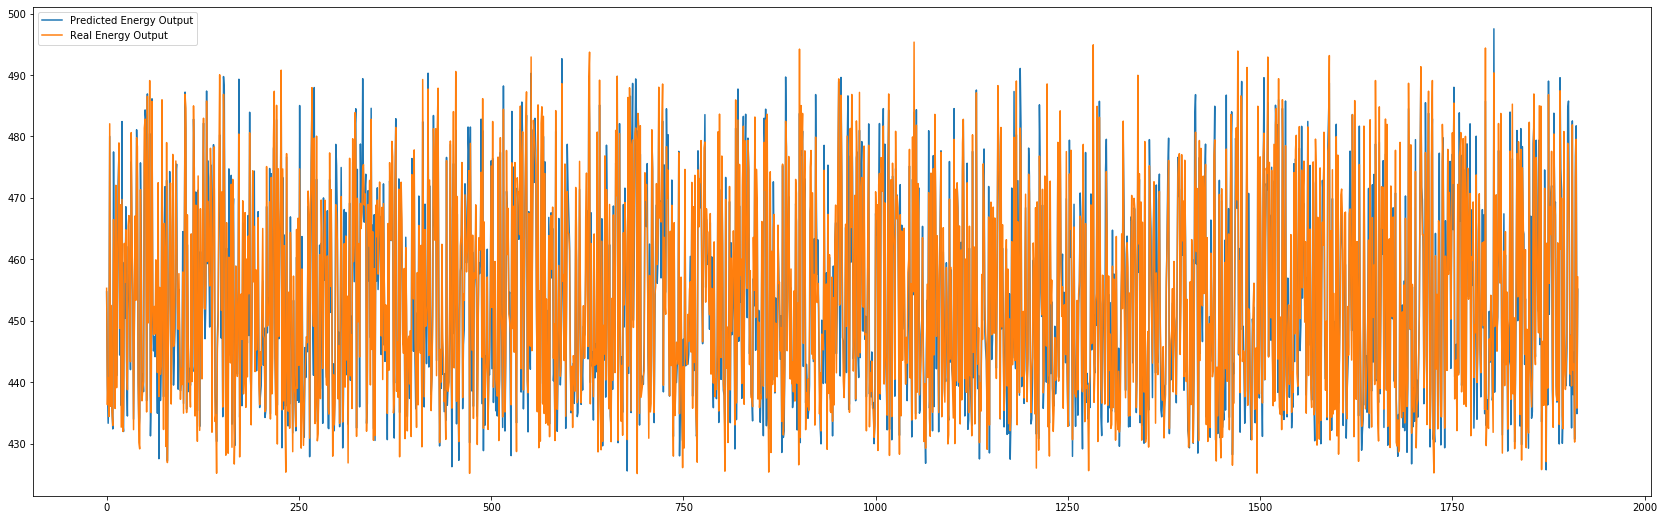

In [99]:
assessment.plot(figsize=(29,9))

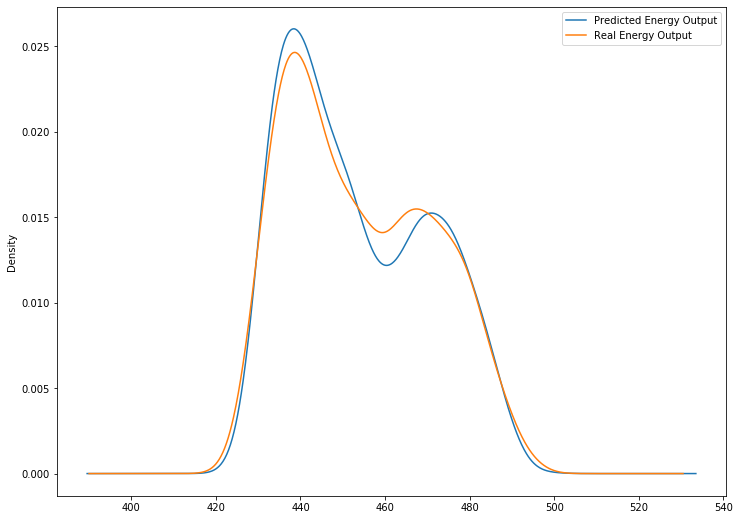

In [101]:
# Having a quick look at kernel density
assessment.plot(figsize=(12,9), kind ='kde')

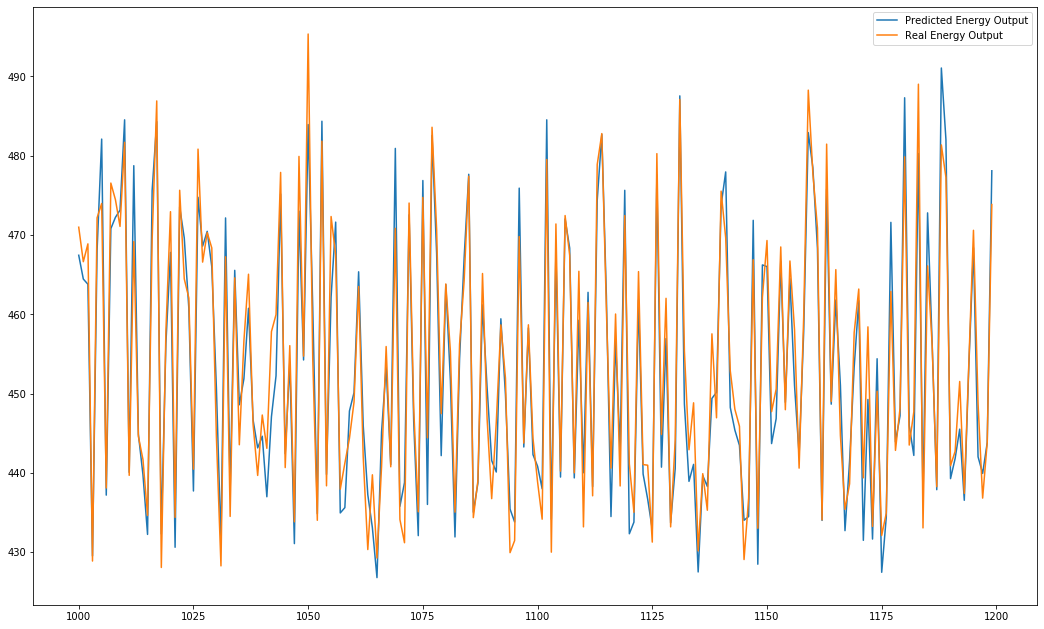

In [102]:
assessment[1000:1200].plot(figsize=(18,11))

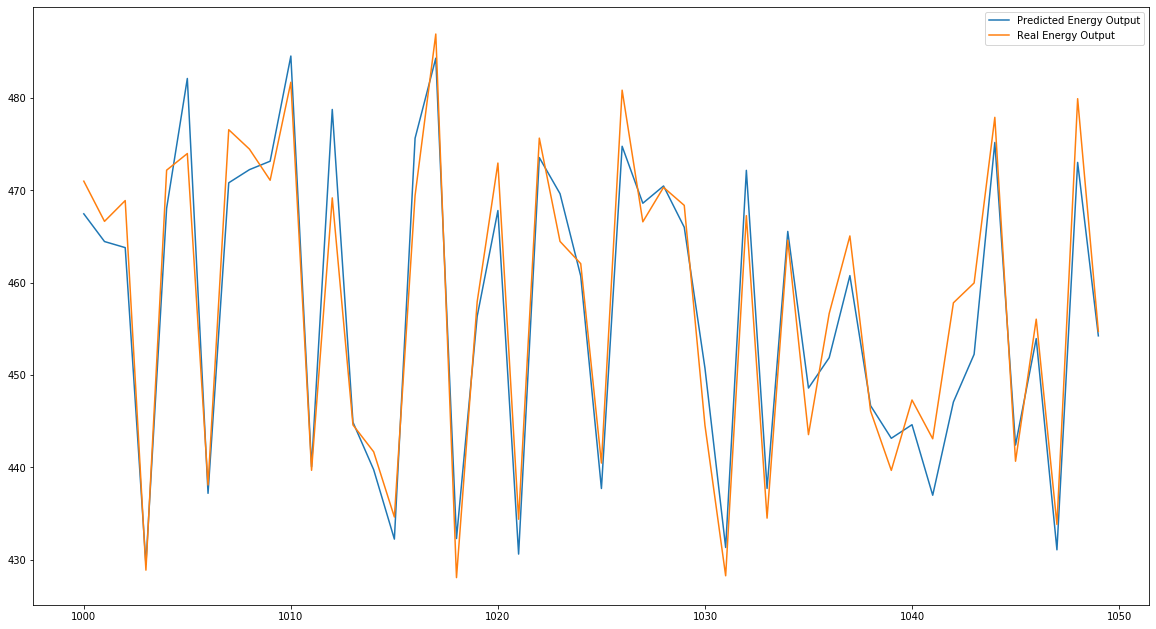

In [104]:
assessment[1000:1050].plot(figsize=(20,11))

In [59]:
# Not bad!

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
mean_squared_error(y_pred,y_test)
mean_absolute_error(y_pred,y_test)
print(f"The root mean squared error is {np.sqrt(mean_squared_error(y_pred,y_test))}MW")
print(f"The mean absolute error is {mean_absolute_error(y_pred,y_test)}MW")

The root mean squared error is 4.743273338351647MW
The mean absolute error is 3.7567543015435194MW


In [84]:
# Conisdering the mean Energy output is 454MW; this is model is 99% accurate
# Not bad!

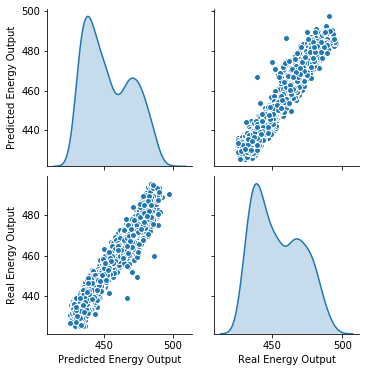

In [153]:
sns.pairplot(assessment,diag_kind='kde',plot_kws=dict(edgecolor="w", linewidth=1))